In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:

scaler=StandardScaler()


In [ ]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosPrueba4.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_tr']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

##df.columns = ['uplink_size_mean','uplink_size_median','uplink_size_MAD','uplink_size_STD','uplink_size_Skewness','uplink_size_Kurtosis','uplink_size_MAX','uplink_size_MIN','uplink_size_MeanSquare','downlink_size_mean','downlink_size_median','downlink_size_MAD', 'downlink_size_STD','downlink_size_Skewness','downlink_size_Kurtosis','downlink_size_MAX','downlink_size_MIN','downlink_size_MeanSquare','both_links_size_mean','both_links_size_mean','both_links_size_MAD','both_links_size_STD','both_links_size_Skewness','both_links_size_Kurtosis','both_links_size_MAX','both_links_size_MIN','both_links_size_MeanSquare','uplink_interval_mean','uplink_interval_median','uplink_interval_MAD','uplink_interval_STD','uplink_interval_Skewness','uplink_interval_Kurtosis','uplink_interval_MAX','uplink_interval_MIN','uplink_interval_MeanSquare','downlink_interval_mean','downlink_interval_median','downlink_interval_MAD','downlink_interval_STD','downlink_interval_Skewness','downlink_interval_Kurtosis','downlink_interval_MAX','downlink_interval_MIN','downlink_interval_MeanSquare','both_links_interval_mean','both_links_interval_median','both_links_interval_MAD','both_links_interval_STD','both_links_interval_Skewness','both_links_interval_Kurtosis','both_links_interval_MAX','both_links_interval_MIN','both_links_interval_MeanSquare','Label']
df.sample(8)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
725,0.000168,0.000225,0.000123,0.000071,2.668664,6.540874,0.000962,0.000000e+00,0.000280,86.32,35.630789,62.0,0.0,0.760196,-1.436164,138.0,62.0,93.316665,1.0
329,0.001548,0.006246,0.000338,0.000034,7.172404,54.872793,0.055204,2.700000e-04,0.006405,1463.46,125.400000,1476.0,0.0,-9.702000,93.059700,1476.0,222.0,1468.769240,0.0
902,0.000401,0.000833,0.000114,0.000157,2.508401,4.807213,0.003086,4.000000e-06,0.000921,103.80,38.000000,138.0,0.0,-0.198000,-1.980300,138.0,62.0,110.471716,1.0
724,0.021710,0.177637,0.000338,0.000004,9.196744,85.732147,1.745177,3.330000e-04,0.178075,1651.68,173.931537,1676.0,0.0,-7.087424,50.135043,1676.0,240.0,1660.721674,0.0
666,0.009309,0.022980,0.000340,0.000203,3.591242,15.870472,0.153507,8.200000e-05,0.024687,1148.53,510.742111,1476.0,0.0,-1.021956,-0.828343,1476.0,222.0,1255.933951,0.0
888,0.012613,0.056160,0.000782,0.000534,5.815637,34.784874,0.397920,1.800000e-04,0.057284,1277.74,479.842517,1638.0,0.0,-0.825144,-0.940827,1638.0,222.0,1364.025608,0.0
995,0.005285,0.031369,0.000474,0.000067,6.749108,44.019274,0.224935,3.210000e-04,0.031656,1605.04,168.243806,1676.0,0.0,-1.955865,1.940116,1676.0,1074.0,1613.746052,0.0
667,0.000219,0.000473,0.000116,0.000076,5.569660,35.052665,0.003842,1.000000e-06,0.000519,79.10,30.606496,62.0,0.0,1.382961,-0.058027,138.0,62.0,84.759660,1.0


In [ ]:
#Información General de DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1063 non-null   float64
 1   1       1063 non-null   float64
 2   2       1063 non-null   float64
 3   3       1063 non-null   float64
 4   4       1063 non-null   float64
 5   5       1063 non-null   float64
 6   6       1063 non-null   float64
 7   7       1063 non-null   float64
 8   8       1063 non-null   float64
 9   9       1063 non-null   float64
 10  10      1063 non-null   float64
 11  11      1063 non-null   float64
 12  12      1063 non-null   float64
 13  13      1063 non-null   float64
 14  14      1063 non-null   float64
 15  15      1063 non-null   float64
 16  16      1063 non-null   float64
 17  17      1063 non-null   float64
 18  18      1063 non-null   float64
dtypes: float64(19)
memory usage: 157.9 KB


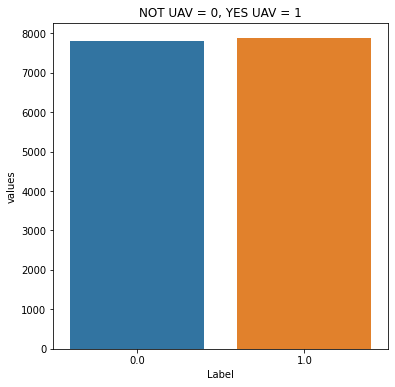

In [ ]:

##Contar el número de registros por clase y graficar
temp = df["Label"].value_counts()
dfp = pd.DataFrame({'Label': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('NOT UAV = 0, YES UAV = 1')
sns.set_color_codes("pastel")
sns.barplot(x = 'Label', y="values", data=dfp)
locs, labels = plt.xticks()
plt.show()

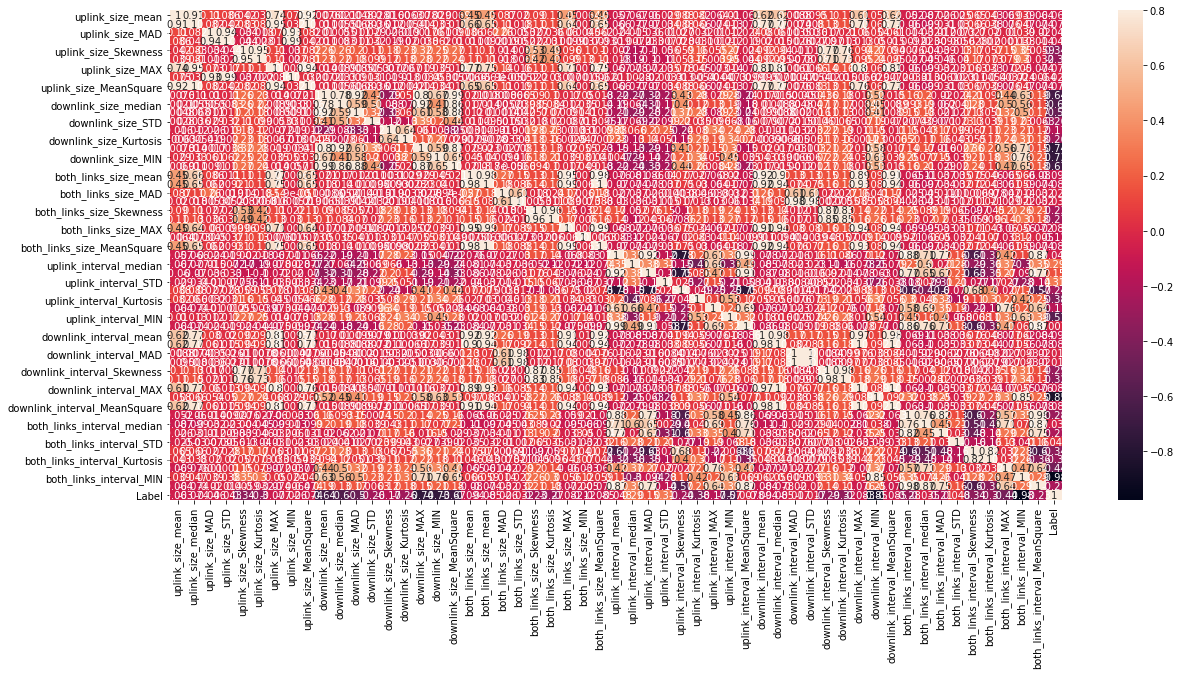

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

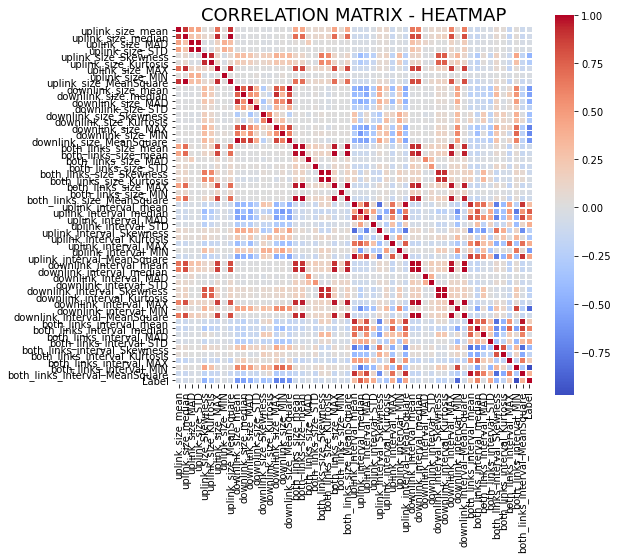

In [ ]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [ ]:
##------SEPARACION DE X Y Y DATOS DE ENTRENAMIENTO ---------------------##
YEntrenamiento = df['Label']
XEntrenamiento = scaler.fit_transform(df.drop(['Label'],axis=1))

print(XEntrenamiento)


[[-0.05788754 -0.07466387 -0.02670504 ...  0.17215402 -0.97034388
   0.3863478 ]
 [-0.05784975 -0.07466918 -0.02629411 ...  0.17215402 -0.97034388
   0.18948921]
 [-0.05784121 -0.07461742 -0.02691601 ...  0.18505406 -0.97034388
   0.00171452]
 ...
 [-0.05804575 -0.07483627 -0.02684864 ...  0.29470448  0.99573343
   1.17715338]
 [-0.05578712 -0.07347706 -0.01773271 ...  0.55270545  0.8405168
  -0.57089338]
 [-0.05788236 -0.07471116 -0.02688424 ...  0.55270545  0.99573343
  -1.28856091]]
--------------------
       uplink_size_mean  ...  both_links_interval_MeanSquare
0              0.009450  ...                     1010.837608
1              0.010903  ...                      952.227436
2              0.011232  ...                      896.321789
3              0.011446  ...                      879.056250
4              0.009621  ...                     1011.447483
...                 ...  ...                             ...
15682          6.799042  ...                      360.186000


In [ ]:
##---------------------DATOS DE PRUEBA-------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosPrueba2.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_tr']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

df.columns = ['uplink_size_mean','uplink_size_median','uplink_size_MAD','uplink_size_STD','uplink_size_Skewness','uplink_size_Kurtosis','uplink_size_MAX','uplink_size_MIN','uplink_size_MeanSquare','downlink_size_mean','downlink_size_median','downlink_size_MAD', 'downlink_size_STD','downlink_size_Skewness','downlink_size_Kurtosis','downlink_size_MAX','downlink_size_MIN','downlink_size_MeanSquare','both_links_size_mean','both_links_size_mean','both_links_size_MAD','both_links_size_STD','both_links_size_Skewness','both_links_size_Kurtosis','both_links_size_MAX','both_links_size_MIN','both_links_size_MeanSquare','uplink_interval_mean','uplink_interval_median','uplink_interval_MAD','uplink_interval_STD','uplink_interval_Skewness','uplink_interval_Kurtosis','uplink_interval_MAX','uplink_interval_MIN','uplink_interval_MeanSquare','downlink_interval_mean','downlink_interval_median','downlink_interval_MAD','downlink_interval_STD','downlink_interval_Skewness','downlink_interval_Kurtosis','downlink_interval_MAX','downlink_interval_MIN','downlink_interval_MeanSquare','both_links_interval_mean','both_links_interval_median','both_links_interval_MAD','both_links_interval_STD','both_links_interval_Skewness','both_links_interval_Kurtosis','both_links_interval_MAX','both_links_interval_MIN','both_links_interval_MeanSquare','Label']
df.sample(8)

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,downlink_size_median,downlink_size_MAD,downlink_size_STD,downlink_size_Skewness,downlink_size_Kurtosis,downlink_size_MAX,downlink_size_MIN,downlink_size_MeanSquare,both_links_size_mean,both_links_size_mean,both_links_size_MAD,both_links_size_STD,both_links_size_Skewness,both_links_size_Kurtosis,both_links_size_MAX,both_links_size_MIN,both_links_size_MeanSquare,uplink_interval_mean,uplink_interval_median,uplink_interval_MAD,uplink_interval_STD,uplink_interval_Skewness,uplink_interval_Kurtosis,uplink_interval_MAX,uplink_interval_MIN,uplink_interval_MeanSquare,downlink_interval_mean,downlink_interval_median,downlink_interval_MAD,downlink_interval_STD,downlink_interval_Skewness,downlink_interval_Kurtosis,downlink_interval_MAX,downlink_interval_MIN,downlink_interval_MeanSquare,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,Label
690,0.036408,0.046116,0.000294,0.000436,0.329614,-2.009162,0.103090,1.760000e-04,0.056111,243.857143,19.777332,228.0,0.0000,0.229081,-2.204082,265.0,228.0,244.543598,0.351929,1.438248,0.000195,0.000073,5.960467,38.982801,11.393176,0.000120,1.473150,298.580645,13.083613,298.0,0.0000,5.258067,37.145457,400.0,282.0,298.864086,0.327294,1.389390,0.000196,0.000074,6.200371,42.270704,11.393176,1.200000e-04,1.420641,294.75,19.486009,298.0,0.0000,0.017272,11.520438,400.0,228.0,295.386983,0.0
758,0.011965,0.026150,0.002330,0.003454,3.426295,14.213324,0.116557,6.990000e-07,0.028156,119.800000,40.381861,88.0,1.4826,0.407582,1.167049,168.0,86.0,126.099960,0.002991,0.013816,0.000049,0.000070,7.478929,61.952766,0.118102,0.000001,0.014052,1013.250000,631.958549,1394.0,136.3992,-0.766084,1.642147,1526.0,76.0,1192.080125,0.002393,0.012252,0.000021,0.000029,8.357999,77.197631,0.116557,6.990000e-07,0.012423,834.56,669.338484,1346.0,266.8680,-0.175305,1.068681,1526.0,76.0,1067.719186,1.0
26,0.013079,0.026529,0.001795,0.002659,3.417590,14.279808,0.119306,3.946000e-06,0.028976,124.000000,41.259130,88.0,2.9652,0.201751,1.043461,172.0,86.0,130.357969,0.003270,0.014942,0.000023,0.000031,7.423856,61.488998,0.127553,0.000002,0.015204,1028.300000,614.262785,1302.0,349.8936,-0.784065,1.797550,1590.0,76.0,1195.827402,0.002616,0.012645,0.000016,0.000018,8.121208,74.233741,0.119306,1.582000e-06,0.012850,847.44,658.469780,1266.0,468.5016,-0.187110,1.148356,1590.0,76.0,1071.168138,1.0
1327,0.015711,0.009549,0.015493,0.008703,-0.102642,2.119119,0.031309,8.968000e-06,0.018267,129.904762,40.941305,168.0,0.0000,-0.095346,1.009091,168.0,88.0,135.910335,0.003938,0.007583,0.000231,0.000332,2.002675,5.894127,0.029883,0.000003,0.008502,812.936709,615.213770,1210.0,421.0584,-0.278005,1.199176,1510.0,76.0,1017.134745,0.003300,0.007083,0.000064,0.000086,2.260825,7.050334,0.029817,2.778000e-06,0.007782,669.50,613.775886,168.0,136.3992,0.200467,1.140811,1510.0,76.0,906.191966,1.0
1383,0.120035,0.448973,0.001710,0.002002,4.967467,24.260577,2.578765,1.140000e-04,0.458123,1173.939394,614.280979,1596.0,0.0000,-0.795770,-1.344250,1596.0,228.0,1320.621158,0.060919,0.297350,0.000955,0.001228,7.332398,54.765667,2.406098,0.000087,0.301344,279.164179,180.835234,228.0,0.0000,3.178629,8.264146,968.0,228.0,331.882419,0.040818,0.244420,0.000527,0.000577,9.084784,84.724067,2.406098,8.700000e-05,0.246597,574.44,567.957306,228.0,0.0000,1.111438,-0.651032,1596.0,228.0,805.810809,0.0
382,0.019052,0.020968,0.007733,0.011208,0.961798,0.036663,0.084194,1.450000e-04,0.028175,566.600000,456.602717,358.0,210.5292,1.070603,-0.474730,1476.0,216.0,724.811617,0.020168,0.018759,0.016682,0.014357,2.107810,6.252012,0.104108,0.000114,0.027416,1052.020000,584.543306,1476.0,0.0000,-0.657719,-1.553377,1476.0,222.0,1200.667

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   uplink_size_mean                1569 non-null   float64
 1   uplink_size_median              1569 non-null   float64
 2   uplink_size_MAD                 1569 non-null   float64
 3   uplink_size_STD                 1569 non-null   float64
 4   uplink_size_Skewness            1569 non-null   float64
 5   uplink_size_Kurtosis            1569 non-null   float64
 6   uplink_size_MAX                 1569 non-null   float64
 7   uplink_size_MIN                 1569 non-null   float64
 8   uplink_size_MeanSquare          1569 non-null   float64
 9   downlink_size_mean              1569 non-null   float64
 10  downlink_size_median            1569 non-null   float64
 11  downlink_size_MAD               1569 non-null   float64
 12  downlink_size_STD               15

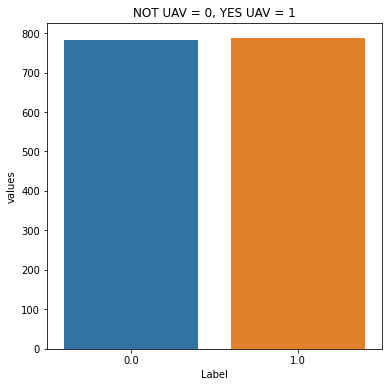

In [ ]:
##Contar el número de registros por clase y graficar
temp = df["Label"].value_counts()
dfp = pd.DataFrame({'Label': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('NOT UAV = 0, YES UAV = 1')
sns.set_color_codes("pastel")
sns.barplot(x = 'Label', y="values", data=dfp)
locs, labels = plt.xticks()
plt.show()

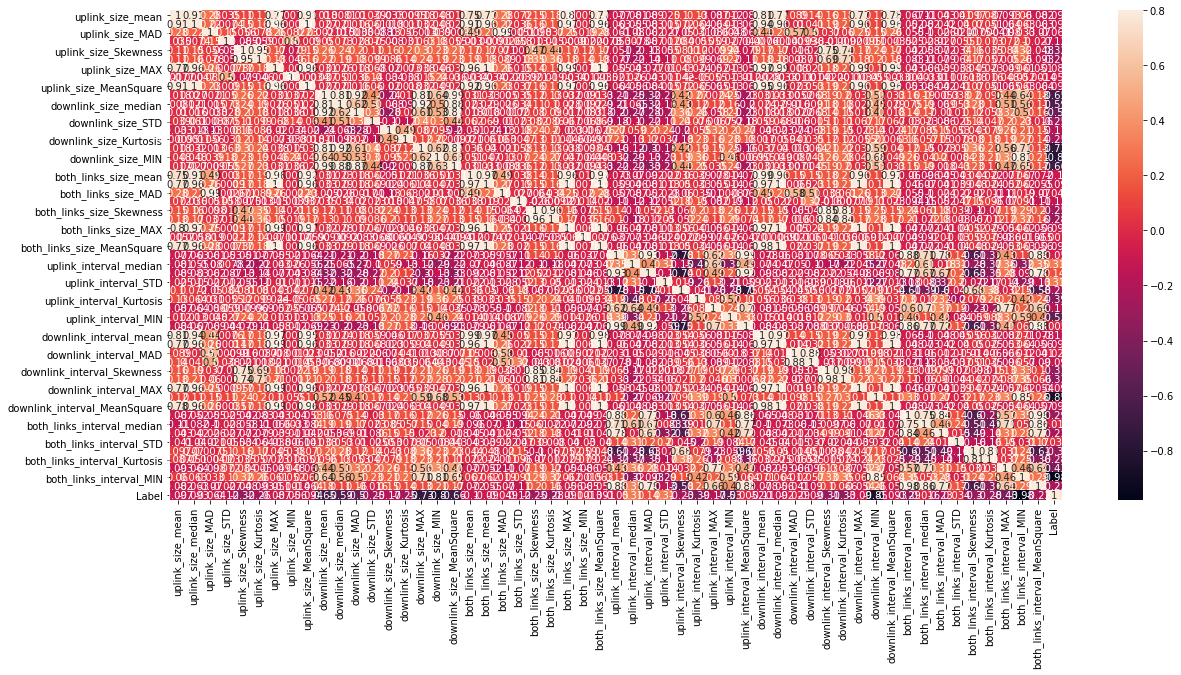

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

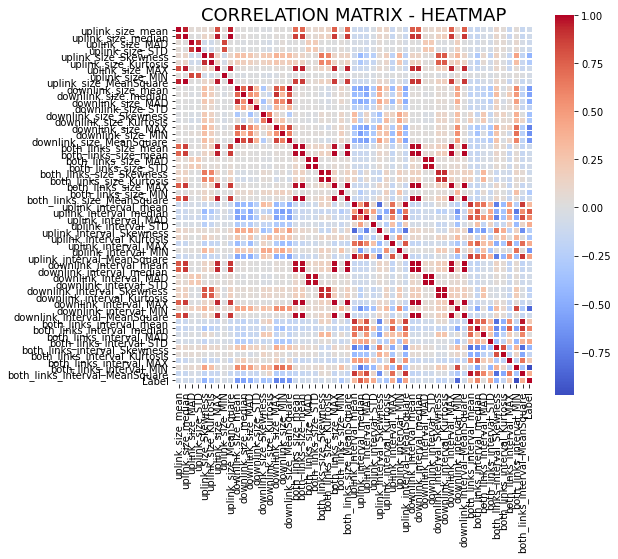

In [ ]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [ ]:
##------SEPARACION DE X Y Y DATOS DE ENTRENAMIENTO ---------------------##
YPrueba = df['Label']
XPrueba = scaler.fit_transform(df.drop(['Label'],axis=1))
##XPrueba = df.drop(['Label'],axis=1)

In [ ]:
print(YPrueba)
print("--------------------------------")
print(XPrueba)
print("--------------------------------")
print(YEntrenamiento)
print("--------------------------------")
print(XEntrenamiento)
print("--------------------------------")

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1564    1.0
1565    1.0
1566    0.0
1567    0.0
1568    1.0
Name: Label, Length: 1569, dtype: float64
--------------------------------
[[-0.08408471 -0.08322149 -0.10481729 ...  0.33065843 -0.971233
   0.66304939]
 [-0.08390836 -0.08309204 -0.10164716 ...  0.43060123  0.82523236
  -0.50691905]
 [-0.08462    -0.08354524 -0.10642342 ...  0.34315128 -0.971233
   0.22030894]
 ...
 [ 0.05247346 -0.02852107  0.64126904 ...  0.45558693  0.7225772
  -1.65974536]
 [-0.08309799 -0.08313773 -0.0945506  ...  0.45558693  0.97921511
   0.0583381 ]
 [-0.08417989 -0.08319998 -0.10513328 ...  0.18074423 -0.971233
   0.78155251]]
--------------------------------
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15682    0.0
15683    0.0
15684    0.0
15685    0.0
15686    0.0
Name: Label, Length: 15687, dtype: float64
--------------------------------
[[-0.05788754 -0.07466387 -0.02670504 ...  0.17215402 -0

In [ ]:
!pip install scikit-plot